In [1]:
%pylab inline
from scipy.integrate import nquad
font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


# Parabolic motion.

How to get the initial velocities from the height $h$ and the range $R$

The equations are:
    
$h = \frac{1}{2} g v_y^2$

$R = \frac{2 v_x v_y}{g}$

$v_x = \sqrt{\frac{g}{8}}$

$v_y = \sqrt{2gh}$


After measuring a lot of times we get the following results:

$R = 10.0 \pm 0.2 m$

$h = 1 \pm 0.2 m$

# 1. Error propagation

$v_x^{0} = \sqrt{\frac{g}{8}} \frac{10}{\sqrt{1}} = 11.2 m s^{-1}$

$v_y^{0} = \sqrt{2g1} = 4.47 m s^{-1}$

$ln v_x = ln \sqrt{\frac{g}{8}} + ln R - \dfrac{1}{2} ln h$

$\frac{\sigma_{v_x}}{v_x} = \sqrt{ \left( \frac{\sigma_{R}}{R} \right)^2 + \frac{1}{4}\left( \frac{\sigma_h}{h}\right) + \frac{1}{4} \left( \frac{\sigma_g}{g} \right)^2} = 0.1$

$\frac{\sigma_{v_y}}{v_y} = \dfrac{1}{R} \dfrac{\sigma_h}{h} = 0.1$

# 2. Monte Carlo method (For frenquitist statistics)

In [2]:
h = np.random.normal(1.0, 0.2, 10000)
R = np.random.normal(10.0, 0.2, 10000)
g1 = np.random.normal(9.81, 0.05, 10000)

In [3]:
def velocities(h, R, g):
    vx = np.sqrt(g/8.0) * R / np.sqrt(h)
    vy = np.sqrt(2*g*h)
    return vx, vy

def velocities2(h, R):
    vx = np.sqrt(9.8/8.0) * R / np.sqrt(h)
    vy = np.sqrt(2*9.8*h)
    return vx, vy

In [4]:
vx_mc, vy_mc = velocities(h, R, g1)
vx_mc2, vy_mc2 = velocities2(h, R)


In [5]:
# This is the correlation given by R
R_0 = 10.0
g_0 = 9.8
vx_1= np.linspace(7, 25)

vy_1 = R_0*g_0/(2.0*vx_1)

In [6]:
# Histogram from the error propagation

vx_ep = np.random.normal(11.07, 0.102, 1000)
vy_ep = np.random.normal(4.43, 0.1, 1000)

weights1 = np.ones(100000)/800000.0

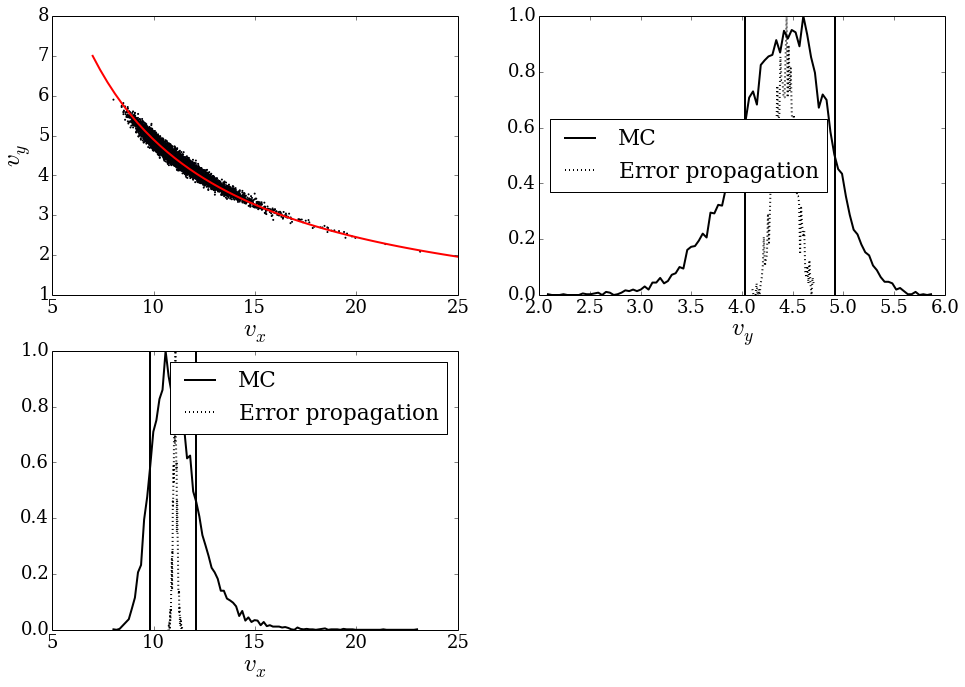

In [7]:
figure(figsize=(16, 11))
subplot(2, 2, 1)
scatter(vx_mc, vy_mc, s=1)
#scatter(vx_mc2, vy_mc2, s=1, c='r')
plot(vx_1, vy_1, c='r', lw=2.0)
xlabel('$v_x$', fontsize=25)
ylabel('$v_y$', fontsize=25)
xlim(5, 25)

subplot(2, 2, 2)
prob1, bins1 = histogram(vy_mc, bins=100, density=1)
prob2, bins2 = histogram(vy_ep, bins=60, density=1)

plot(bins1[:-1], prob1/max(prob1), lw=2, c='k', label='MC')
plot(bins2[:-1], prob2/max(prob2), lw=2, c='k', ls=':', label='Error propagation')
legend()

plt.axvline(4.03, lw=2, c='k') #From Carolyne code
plt.axvline(4.92, lw=2, c='k') #From Carolyne code
legend(loc='best')
xlabel('$v_y$', fontsize=25)
subplot(2, 2, 3)

prob3, bins3 = histogram(vx_mc, bins=100, density=1)
prob4, bins4 = histogram(vx_ep, bins=60, density=1)
plot(bins3[:-1], prob3/max(prob3), lw=2, c='k', label='MC')
plot(bins4[:-1], prob4/max(prob4), lw=2, c='k', ls=':', label='Error propagation')
legend()

plt.axvline(9.82, lw=2.0, c='k') #From Carolyne code
plt.axvline(12.09, lw=2.0, c='k')  #From Carolyne code
xlim(5, 25)

legend(loc='best')
xlabel('$v_x$', fontsize=25)

savefig('Fig1.eps', bbox_inches='tight')

In [155]:
test = np.linspace(0, 100, 100)
print len(test)

new = test.reshape((5, 20))

100


In [10]:
dataC = np.loadtxt('partc_puxuy_grid.dat')
dataD = np.loadtxt('partd_puxuy_grid.dat')

In [11]:
normc = np.max(dataC)
normd = np.max(dataD)

print normc, normd

228.947 0.121399


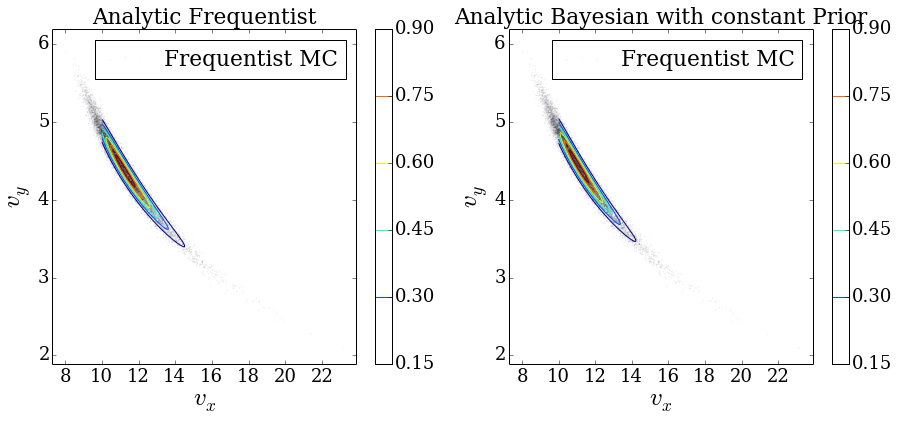

In [12]:
u_x = np.linspace(10, 15, 250)
u_y = np.linspace(3, 6, 250)


figure(figsize=(15, 6))
subplot(1, 2, 1)
title('Analytic Frequentist')
scatter(vx_mc, vy_mc, s=0.1, label='Frequentist MC', alpha=0.1)
contour(u_x, u_y, dataC/normc, lw=2, label='Analytic Frenquentist')
legend()
colorbar()
xlabel('$v_x$', fontsize=25)
ylabel('$v_y$', fontsize=25)


subplot(1, 2, 2)
title('Analytic Bayesian with constant Prior')
scatter(vx_mc, vy_mc, s=0.1, label='Frequentist MC', alpha=0.1)
contour(u_x, u_y, dataD/normd, lw=2)
xlabel('$v_x$', fontsize=25)
ylabel('$v_y$', fontsize=25)
legend()
colorbar()

savefig('ExC.pdf', bbox_inches='tight')

<matplotlib.contour.QuadContourSet instance at 0x7fddbcacff38>

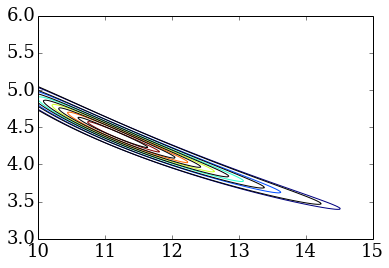

In [13]:
contour(u_x, u_y, dataC/normc, lw=2, cmp='dark')
contour(u_x, u_y, dataD/normd, lw=2, colors='k', alpha=1)


In [270]:
# d, carolyn compute the likelihoods in mathematica.

In [14]:
bayes1 = np.loadtxt('parte_logPr_ux.dat')
bayes2 = np.loadtxt('parte_logPr_uy.dat')
bayes3 = np.loadtxt('parte_logPr_uxanduy.dat')

normb1 = np.max(bayes1)
normb2 = np.max(bayes2)
normb3 = np.max(bayes3)


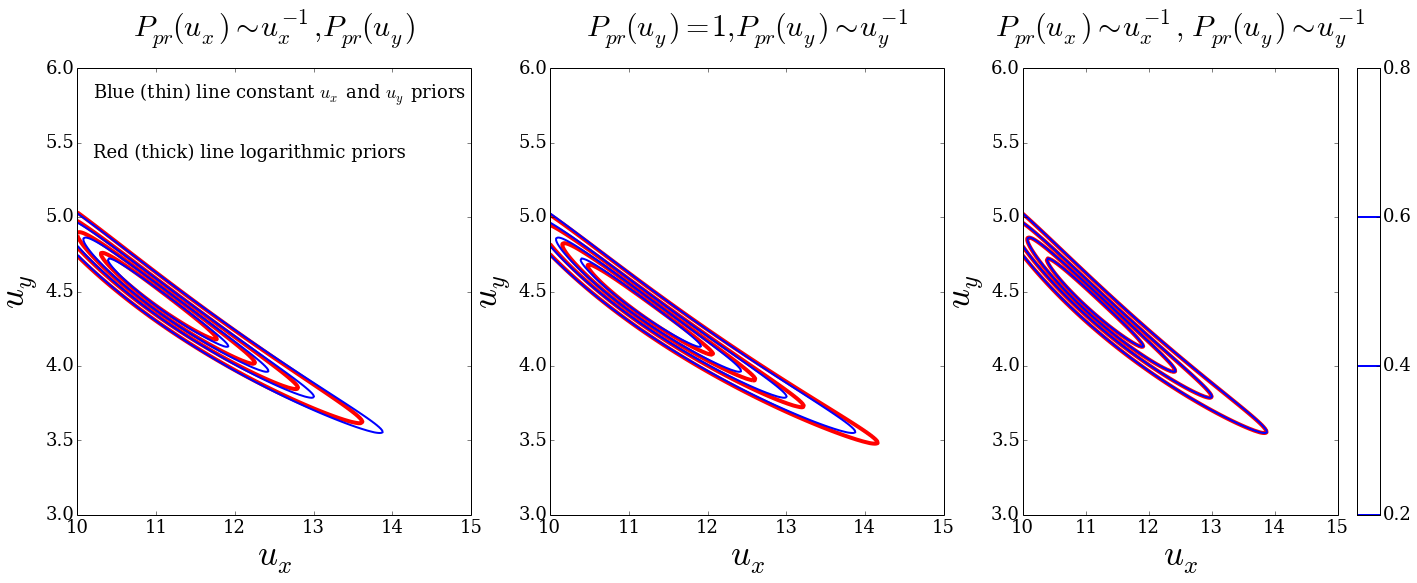

In [20]:
figure(figsize=(24, 8))
subplot(1, 3, 1)
t = title(r'$P_{pr}(u_x)\sim u_{x}^{-1}, P_{pr}(u_y)$', fontsize=30)
t.set_y(1.06)
text(10.2, 5.8, 'Blue (thin) line constant $u_x$ and $u_y$ priors')
text(10.2, 5.4, 'Red (thick) line logarithmic priors')
contour(u_x, u_y, bayes1/normb1, 4, lw=2, colors='r', linewidths=4.0)
contour(u_x, u_y, dataD/normd, 4, lw=2, colors='b', linewidths=2.0)
xlabel('$u_x$', fontsize=35)
ylabel('$u_y$', fontsize=35)

subplot(1, 3, 2)
t = title(r'$P_{pr}(u_y)=1, P_{pr}(u_y)\sim u_{y}^{-1}$', fontsize=30)
t.set_y(1.06)
contour(u_x, u_y, bayes2/normb2, 4, lw=2, colors='r', linewidths=4.0)
contour(u_x, u_y, dataD/normd, 4, lw=2, colors='b', linewidths=2.0)
xlabel('$u_x$', fontsize=35)
ylabel('$u_y$', fontsize=35)

subplot(1, 3, 3)
t = title(r'$P_{pr}(u_x) \sim u_{x}^{-1},\  P_{pr}(u_y)\sim u_{y}^{-1}$', fontsize=30)
t.set_y(1.06)
contour(u_x, u_y, bayes3/normb3, 4, lw=2, colors='r', linewidths=4.0)
contour(u_x, u_y, dataD/normd, 4,lw=2, colors='b', linewidths=2.0, alpha=1.0)
xlabel('$u_x$', fontsize=35)
ylabel('$u_y$', fontsize=35)
colorbar()
savefig('ExD.pdf', bbox_inches='tight')
